# Bokeh Exercises

*The "User Guide" linked on this page is a very good resource :* https://bokeh.pydata.org/en/latest/


## 1. Create a single Bokeh plot of some data 

*Include the standard pan, wheel_zoom, box_zoom, reset, save, box_select, and lasso_select tools, but no other special widgets*

In [1]:
import numpy as np
import pandas as pd
from bokeh.plotting import *
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, CustomJS, Select
output_notebook()
#output_file("solution.html", title='solution')

Loading BokehJS ...

In [2]:
df = pd.read_csv('../datasets/compositepars_2019.08.21_11.02.05.csv')
df

,rowid,fpl_hostname,fpl_letter,fpl_name,fpl_discmethod,fpl_controvflag,fpl_disc,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,...,fst_meterr1,fst_meterr2,fst_metlim,fst_metratio,fst_metreflink,fst_age,fst_ageerr1,fst_ageerr2,fst_agelim,fst_agereflink
0,1,11 Com,b,11 Com b,Radial Velocity,0,2007,326.030000,0.320000,-0.320000,...,0.090,-0.090,0.0,[Fe/H],<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,NaN,NaN,NaN,NaN,NaN
1,2,11 UMi,b,11 UMi b,Radial Velocity,0,2009,516.219970,3.200000,-3.200000,...,NaN,NaN,0.0,[Fe/H],<a refstr=STASSUN_ET_AL__2017 href=https://ui....,1.56,0.54,-0.54,0.0,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...
2,3,14 And,b,14 And b,Radial Velocity,0,2008,185.840000,0.230000,-0.230000,...,0.030,-0.030,0.0,[Fe/H],<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,4.50,1.90,-1.90,0.0,<a refstr=BAINES_ET_AL__2009 href=https://ui.a...
3,4,14 Her,b,14 Her b,Radial Velocity,0,2002,1773.400020,2.500000,-2.500000,...,NaN,NaN,0.0,[Fe/H],<a refstr=STASSUN_ET_AL__2017 href=https://ui....,5.24,NaN,NaN,0.0,<a refstr=TURNBULL_2015 href=https://ui.adsabs...
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1996,798.500000,1.000000,-1.000000,...,NaN,NaN,0.0,[Fe/H],<a refstr=STASSUN_ET_AL__2017 href=https://ui....,7.40,0.10,-0.10,0.0,<a refstr=BULDGEN_ET_AL__2016 href=https://ui....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4038,4039,tau Gem,b,tau Gem b,Radial Velocity,0,2013,305.500000,0.100000,-0.100000,...,0.100,-0.100,0.0,[Fe/H],<a refstr=MITCHELL_ET_AL__2013 href=https://ui...,1.22,0.76,-0.76,0.0,<a refstr=MITCHELL_ET_AL__2013 href=https://ui...
4039,4040,ups And,b,ups And b,Radial Velocity,0,1996,4.617033,0.000023,-0.000023,...,0.030,-0.030,0.0,[Fe/H],<a refstr=MALDONADO_ET_AL__2015 href=https://u...,5.00,NaN,NaN,0.0,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...
4040,4041,ups And,c,ups And c,Radial Velocity,0,1999,241.258000,0.064000,-0.064000,...,0.030,-0.030,0.0,[Fe/H],<a refstr=MALDONADO_ET_AL__2015 href=https://u...,5.00,NaN,NaN,0.0,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...
4041,4042,ups And,d,ups And d,Radial Velocity,0,1999,1276.460000,0.570000,-0.570000,...,0.030,-0.030,0.0,[Fe/H],<a refstr=MALDONADO_ET_AL__2015 href=https://u...,5.00,NaN,NaN,0.0,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...


In [3]:
# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=np.log10(df['fpl_bmasse']), y=np.log10(df['fpl_rade'])))

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"

# create a new plot and add a renderer
f = figure(tools=TOOLS, width=350, height=350, title=None)
f.circle('x', 'y', source=source, color='black', alpha=0.3)
f.xaxis.axis_label = 'log10(mass [Earth masses])'
f.yaxis.axis_label = 'log10(radius [Earth radii])'

# put the subplots in a gridplot
p = gridplot([[f]])

# show the results
show(p)
#

## 2. Create a single Bokeh plot of some data with some widget

*Include the standard pan, wheel_zoom, box_zoom, reset, save, box_select, and lasso_select tools, and also a widget (e.g., slider, dropdown selection, etc.)  that controls some aspect of the plot*

In [4]:
import matplotlib.pyplot as plt

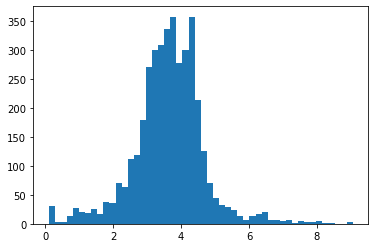

In [5]:
eccsze = (df['fpl_eccen'])*10.
persze = (np.log10(df['fpl_orbper'])*3).clip(0.1,10)
teffsze = ((np.log10(df['fst_teff']) - 3.5)*10).clip(0.1,10)
lumsze = ((df['fst_lum'] + 2.5)*1.5).clip(0.1,10)

f,ax = plt.subplots()
_ = ax.hist(lumsze, bins=50)

In [6]:
# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=np.log10(df['fpl_bmasse']), 
                                    y=np.log10(df['fpl_rade']),
                                    size=eccsze,
                                    ecc=eccsze,
                                    period=persze,
                                    Teff=teffsze,
                                    lum=lumsze
                         ))


TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"

# create a new plot and add a renderer
f = figure(tools=TOOLS, width=350, height=350, title=None, x_range=(-2, 5), y_range=(-0.5, 1.5))
circle = f.circle('x', 'y', source=source, color='black', alpha=0.3, size='size')
f.xaxis.axis_label = 'log10(mass [Earth masses])'
f.yaxis.axis_label = 'log10(radius [Earth radii])'

# put the subplots in a gridplot
p = gridplot([[f]])

#define the widgets
options = ["ecc","period","Teff","lum"]
select = Select(title="Size", value='ecc', options=options)


callback = CustomJS(args=dict(source=source, select=select), code="""
    var sze = select.value;
    source.data.size = source.data[sze];
    source.change.emit();
""")
select.js_on_change('value', callback)
        
layout = row(
    p,
    select,
)

# show the results
show(layout)